In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv('all-menu.csv')
df.head()
df.tail()
num_rows, num_cols = df.shape
print("Number of columns: ", num_cols)
print("Number of rows: ", num_rows)
for i in df.columns:
    unique = df[i].unique()
    num_unique = df[i].nunique()
    print("For column ",i,", unique enteries  are as follows: ", unique)
    print("For column ",i,", number of unique enteries are: ", num_unique)

Number of columns:  18
Number of rows:  242
For column  Beverage_category , unique enteries  are as follows:  ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']
For column  Beverage_category , number of unique enteries are:  9
For column  Beverage , unique enteries  are as follows:  ['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (Wi

In [170]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [171]:
null_count = df.isnull().sum()
df_new = df.dropna()
print(df_new)

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

In [172]:
print(df_new.columns)
df_new = df_new.rename(columns={
    'Beverage': 'Refreshments',
    'Total Carbohydrates (g)': 'Carbohydrates (g)',
    'Calories': 'Caloric Content'
})
df_new = df_new.drop(columns=[' Sodium (mg)', ' Dietary Fibre (g)'])
print(df_new.columns)


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')
Index(['Beverage_category', 'Refreshments', 'Beverage_prep', 'Caloric Content',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Sugars (g)',
       ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [173]:
numerical_columns = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)
numerical_df = df[numerical_columns]
min = numerical_df.min()
max = numerical_df.max()
mean = numerical_df.mean()
std = numerical_df.std()
var = numerical_df.var()
sum = numerical_df.sum()
print("Minimum values for each numerical column:")
print(min)
print("Maximum values for each numerical column:")
print(max)
print("Mean values for each numerical column:")
print(mean)
print("Standard deviation for each numerical column:")
print(std)
print("Variance for each numerical column:")
print(var)
print("Sum for each numerical column:")
print(sum)

Minimum values for each numerical column:
Calories                     0.0
Trans Fat (g)                0.0
Saturated Fat (g)            0.0
 Sodium (mg)                 0.0
 Total Carbohydrates (g)     0.0
Cholesterol (mg)             0.0
 Dietary Fibre (g)           0.0
 Sugars (g)                  0.0
 Protein (g)                 0.0
dtype: float64
Maximum values for each numerical column:
Calories                     510.0
Trans Fat (g)                  9.0
Saturated Fat (g)              0.3
 Sodium (mg)                  40.0
 Total Carbohydrates (g)     340.0
Cholesterol (mg)              90.0
 Dietary Fibre (g)             8.0
 Sugars (g)                   84.0
 Protein (g)                  20.0
dtype: float64
Mean values for each numerical column:
Calories                     193.871901
Trans Fat (g)                  1.307025
Saturated Fat (g)              0.037603
 Sodium (mg)                   6.363636
 Total Carbohydrates (g)     128.884298
Cholesterol (mg)              35.99

In the respons above, I took reference from Google Gemini to select columns with numerical values.

In [174]:
new_num_rows, num_new_columns = df_new.shape
sample = int(new_num_rows * 0.25)
subset = []
original = df_new.copy()
for i in range(4):
    sampled_subset = original.sample(sample, replace=False)
    subset.append(sampled_subset)
    original = original[~original.index.isin(sampled_subset.index)]
subset_1, subset_2, subset_3, subset_4 = subset
print("Subset 1:")
print(subset_1)
print("\nSubset 2:")
print(subset_2)
print("\nSubset 3:")
print(subset_3)
print("\nSubset 4:")
print(subset_4)
    

Subset 1:
                     Beverage_category  \
48             Classic Espresso Drinks   
210        Frappuccino® Blended Coffee   
69           Signature Espresso Drinks   
163              Shaken Iced Beverages   
134                   Tazo® Tea Drinks   
49             Classic Espresso Drinks   
3                               Coffee   
61             Classic Espresso Drinks   
29             Classic Espresso Drinks   
21             Classic Espresso Drinks   
70           Signature Espresso Drinks   
170              Shaken Iced Beverages   
232         Frappuccino® Blended Crème   
9              Classic Espresso Drinks   
77           Signature Espresso Drinks   
182        Frappuccino® Blended Coffee   
31             Classic Espresso Drinks   
226  Frappuccino® Light Blended Coffee   
39             Classic Espresso Drinks   
65           Signature Espresso Drinks   
230         Frappuccino® Blended Crème   
141                   Tazo® Tea Drinks   
160              Shaken 

In the response above, I took refernce from 'numpy.org', 'pandas.pydata.org', some YouTube videos, and some AI tools

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <BarContainer object of 20 artists>)

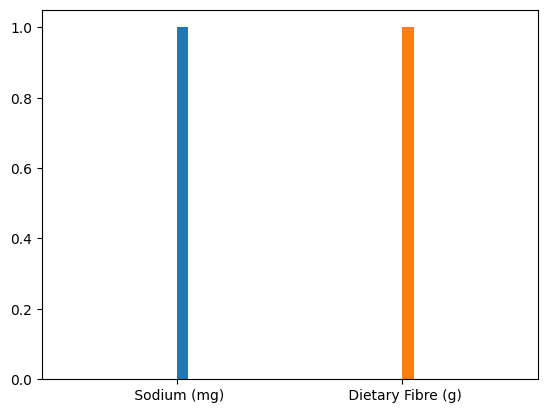

In [175]:


plt.hist(df.columns[7],   bins=20)
plt.hist(df.columns[10], bins=20)

<Axes: >

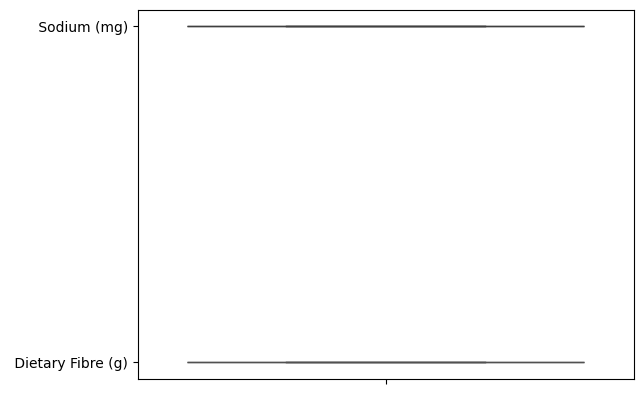

In [176]:
sns.boxplot(df.columns[7])
sns.boxplot(df.columns[10])